In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
path = Path(Config.get_key('data_path')).expanduser()/'handwritten'
#bs = 4096
#tfms = get_transforms(do_flip=False)
#data = ImageDataBunch.from_folder(path, train='Train', valid='Validation', ds_tfms=tfms, size=32, bs=bs)
#learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [3]:
classes = ['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [4]:
#empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms()).normalize(imagenet_stats)
empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms())
learn = create_cnn(empty_data, models.resnet34)
# The model was created as DataParallel, therefore we need to load it as DataParallel for inference.
learn.model = torch.nn.DataParallel(learn.model)

In [5]:
learn.path = Path('.')
learn.load('stage-2-resnet34-32px')

In [6]:
""" This works fine as it comes from Validation set. Commenting
img_folder = path/'Validation/J'
img_path = path/'Validation/J/50.jpg'
img_folder.ls()
#img = open_image(data.train_ds.x[50000])
#img = open_image(img_path)
"""

" This works fine as it comes from Validation set. Commenting\nimg_folder = path/'Validation/J'\nimg_path = path/'Validation/J/50.jpg'\nimg_folder.ls()\n#img = open_image(data.train_ds.x[50000])\n#img = open_image(img_path)\n"

In [7]:
#img.show()

In [8]:
#learn.predict(img)

In [9]:
#! wget http://yourstorage.blob.core.windows.net/ficheros/e.png

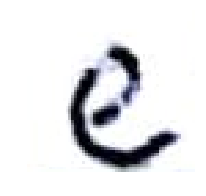

In [10]:
img = open_image("e.png")
img.show()

In [11]:
learn.predict(img)

('E',
 tensor(18),
 tensor([3.6386e+00, 1.6400e+00, 2.5162e-01, 9.4365e-01, 3.8610e-01, 4.6063e+00,
         2.2263e+00, 1.5297e+00, 2.2841e-02, 1.3320e-01, 2.1119e+01, 5.0088e-02,
         2.4759e-01, 3.4885e-02, 6.3916e+00, 7.3167e-01, 1.3503e+00, 1.4749e+01,
         5.9344e+02, 6.6867e+00, 1.7525e-01, 1.0570e-02, 1.8196e+00, 4.3867e+00,
         1.0645e-01, 5.1422e-01, 1.2771e+00, 2.7306e+01, 5.1395e+01, 1.6666e+00,
         1.3637e+01, 1.6401e+00, 1.4222e+02, 1.3468e+00, 1.6043e+00, 6.1262e+00,
         4.7501e-01, 2.8776e-02, 4.0821e+01]))

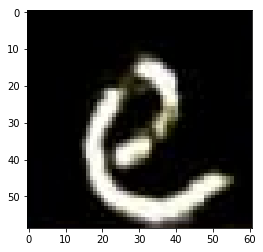

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('e.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [13]:
cv2.imwrite('einvert.png',img)

True

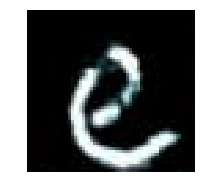

In [14]:
img = open_image("einvert.png")
img.show()

In [15]:
learn.predict(img)

('K',
 tensor(24),
 tensor([5.3174e-01, 1.2557e+00, 8.4176e-01, 4.0093e-01, 2.4198e+00, 1.9128e-01,
         2.2537e+00, 8.4933e-02, 2.7040e+01, 6.5522e+00, 4.9513e-01, 1.4669e-02,
         1.8519e-03, 1.1338e+00, 2.0521e+00, 6.0062e+00, 8.6681e-02, 2.0934e-02,
         4.6613e+00, 2.2624e+00, 8.7415e-02, 3.9539e+01, 1.5602e+00, 9.2197e-02,
         8.8276e+01, 2.5889e+00, 3.8027e-01, 5.1441e+00, 4.0300e-02, 1.4792e-02,
         6.1538e-01, 4.4158e+00, 2.9362e+01, 1.6135e+00, 1.9619e-01, 2.4888e+00,
         7.1234e-01, 4.9192e-02, 1.8726e+00]))

In [16]:
img.shape

torch.Size([3, 59, 61])

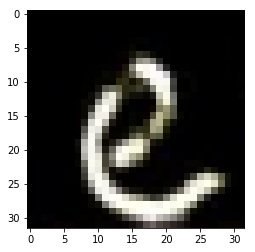

In [17]:
img = cv2.imread('einvert.png')
img = cv2.resize(img, (32,32))
plt.imshow(img)

In [18]:
cv2.imwrite('einvert32x32.png',img)

True

In [19]:
img = open_image("einvert32x32.png")
learn.predict(img)

('@',
 tensor(13),
 tensor([6.0553e-01, 1.8675e+00, 1.7887e+02, 7.6369e-01, 2.2537e+00, 4.1017e+00,
         1.4263e+00, 8.7295e-02, 8.8577e+00, 1.5597e+01, 2.8116e-02, 1.6736e+00,
         4.9780e-02, 1.8388e+03, 1.6073e-01, 5.9267e-01, 1.7314e+01, 9.5508e-01,
         3.1125e+01, 3.5482e-01, 9.2296e+00, 1.2969e-01, 9.7825e-01, 2.1720e+00,
         1.1083e-01, 3.7245e+00, 1.8879e-01, 2.1868e-02, 6.5479e-02, 1.2328e-01,
         4.4325e-01, 4.5128e+00, 4.1941e-02, 2.3217e-01, 2.2801e-01, 2.4277e-01,
         1.8937e-01, 4.4346e-01, 9.9572e-01]))

In [20]:
#! rm 4.png*
#! wget http://yourstorage.blob.core.windows.net/ficheros/4.png

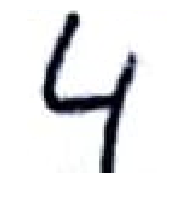

In [21]:
img = open_image("4.png")
img.show()

In [22]:
learn.predict(img)

('A',
 tensor(14),
 tensor([4.3342e+00, 4.1307e-01, 3.2498e-02, 9.9408e-02, 1.9466e+00, 1.7863e+01,
         4.6578e-01, 1.1375e-01, 1.4924e+00, 1.0553e+00, 3.1489e-02, 6.0895e-02,
         3.9846e-03, 3.2297e-02, 1.2899e+02, 4.2046e+01, 7.8677e-02, 5.2793e+01,
         1.9115e+00, 5.7047e-02, 3.9228e-01, 2.4431e+00, 1.2162e+00, 5.3275e+01,
         5.9486e-02, 3.2763e+00, 2.8085e+00, 9.7070e+00, 2.3352e-01, 1.7009e-02,
         9.2983e+00, 3.3875e+01, 3.5483e-02, 1.1104e+00, 2.9345e-01, 6.3530e-01,
         8.6206e-01, 5.8392e-02, 1.8066e+00]))

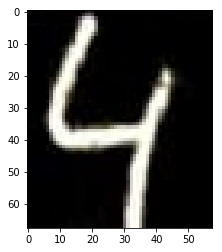

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('4.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [24]:
cv2.imwrite('4invert.png',img)

True

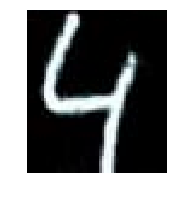

In [25]:
img = open_image("4invert.png")
img.show()

In [26]:
learn.predict(img)

('#',
 tensor(0),
 tensor([2.3041e+05, 1.9771e+01, 5.9362e-04, 9.0082e-06, 4.8550e-02, 8.7049e+01,
         5.7090e-01, 7.3029e-02, 9.8995e-03, 1.2363e+00, 1.2089e+00, 4.2477e-09,
         2.4246e-04, 2.6890e+02, 3.3473e+01, 2.6917e+01, 2.5073e-04, 1.3537e+00,
         4.8122e+00, 4.1500e-04, 4.3830e-03, 2.4442e-01, 2.2846e-01, 1.5421e+04,
         6.7920e-03, 1.0825e-02, 8.9473e+04, 3.3617e+02, 1.3749e+02, 2.2891e-04,
         5.6644e+04, 8.2494e-03, 5.6983e-06, 8.1387e+00, 8.6351e+00, 5.2689e+03,
         9.8112e-04, 1.7004e-04, 4.8900e-02]))

In [27]:
img.shape

torch.Size([3, 68, 58])

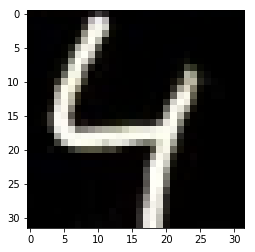

In [28]:
img = cv2.imread('4invert.png')
img = cv2.resize(img, (32,32))
plt.imshow(img)

In [29]:
cv2.imwrite('4invert32x32.png',img)

True

In [30]:
img = open_image("4invert32x32.png")
learn.predict(img)

('4',
 tensor(7),
 tensor([4.5298e-01, 1.0183e+00, 2.6734e+00, 1.7208e-01, 5.1766e+00, 1.3773e-01,
         3.6783e-02, 4.0194e+03, 2.2865e-01, 5.3999e-02, 5.9011e+01, 1.5943e-01,
         1.4098e+00, 6.0198e-01, 1.1692e-01, 3.7832e-02, 4.2469e-01, 1.7785e-01,
         6.1907e-02, 7.4949e-01, 1.1102e-01, 1.5986e+00, 5.0869e+00, 1.1748e+00,
         3.0682e+00, 7.8655e+00, 2.0891e+00, 2.6981e+00, 4.5349e-02, 1.5400e-01,
         5.0245e-02, 4.7462e-02, 2.8879e+01, 2.5472e+01, 8.7587e+00, 2.9525e-01,
         1.1883e+01, 2.0372e+03, 2.6714e+00]))